# Importation des librairies

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
import ast
from scipy import stats

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [86]:
df_effective_args = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/P8/dataset/train_light.csv',encoding="utf-8",header=(0))

# Nettoyage pour approche TF-IDF

## Remplissage des lignes

In [87]:
print((100-100*(df_effective_args.isna().sum()/(df_effective_args.shape[0]))).sort_values(ascending=False))
print(df_effective_args.dtypes.value_counts())

discourse_text             100.0
discourse_type             100.0
discourse_effectiveness    100.0
dtype: float64
object    3
dtype: int64


## Creation des premiers tokens (longueur > 1) et passage en minuscule

In [88]:
def create_token(string):
  tokenizer = nltk.RegexpTokenizer(r'\w+')
  string = tokenizer.tokenize(string.lower())
  list_tokens_elements = [element for element in string if len(element)>1]
  return list_tokens_elements

In [89]:
df_effective_args['discourse_text_tokenized'] = df_effective_args['discourse_text'].apply(create_token)

In [90]:
df_effective_args.head(2)

,discourse_text,discourse_type,discourse_effectiveness,discourse_text_tokenized
0,"Hi, i'm Isaac, i'm going to be writing about h...",Lead,Adequate,"[hi, isaac, going, to, be, writing, about, how..."
1,"On my perspective, I think that the face is a ...",Position,Adequate,"[on, my, perspective, think, that, the, face, ..."


## La lemmantization 

In [91]:
lemmatizer = WordNetLemmatizer()

In [92]:
def create_lemmatization(list_of_words_tokenized) :
  list_of_words_tokenized_lemmantized = []
  for token in list_of_words_tokenized:
    lemmetized_word = lemmatizer.lemmatize(token)
    if len(lemmetized_word) > 1 : 
      list_of_words_tokenized_lemmantized.append(lemmetized_word)
  return list_of_words_tokenized_lemmantized

In [93]:
df_effective_args['discourse_text_lemmatized'] = df_effective_args['discourse_text_tokenized'].apply(create_lemmatization)

In [94]:
df_effective_args

,discourse_text,discourse_type,discourse_effectiveness,discourse_text_tokenized,discourse_text_lemmatized
0,"Hi, i'm Isaac, i'm going to be writing about h...",Lead,Adequate,"[hi, isaac, going, to, be, writing, about, how...","[hi, isaac, going, to, be, writing, about, how..."
1,"On my perspective, I think that the face is a ...",Position,Adequate,"[on, my, perspective, think, that, the, face, ...","[on, my, perspective, think, that, the, face, ..."
2,I think that the face is a natural landform be...,Claim,Adequate,"[think, that, the, face, is, natural, landform...","[think, that, the, face, is, natural, landform..."
3,"If life was on Mars, we would know by now. The...",Evidence,Adequate,"[if, life, was, on, mars, we, would, know, by,...","[if, life, wa, on, mar, we, would, know, by, n..."
4,People thought that the face was formed by ali...,Counterclaim,Adequate,"[people, thought, that, the, face, was, formed...","[people, thought, that, the, face, wa, formed,..."
...,...,...,...,...,...
36672,For many people they don't like only asking on...,Claim,Adequate,"[for, many, people, they, don, like, only, ask...","[for, many, people, they, don, like, only, ask..."
36673,also people have different views and opinions ...,Claim,Adequate,"[also, people, have, different, views, and, op...","[also, people, have, different, view, and, opi..."
36674,Advice is something that can impact a persons ...,Position,Adequate,"[advice, is, something, that, can, impact, per...","[advice, is, something, that, can, impact, per..."
36675,someone can use everything that many people sa...,Evidence,Ineffective,"[someone, can, use, everything, that, many, pe...","[someone, can, use, everything, that, many, pe..."


## Nettoyage des Stop words

### Stop words (corpus et nltk)

In [95]:
list_all_words = [j for i in df_effective_args['discourse_text_lemmatized'].tolist() for j in i]
dictionnaire_des_frequences = nltk.FreqDist(list_all_words)

In [96]:
stop_words_corpus = []
nombre_de_mot_selectionne = 25
for i in range(0, nombre_de_mot_selectionne):
  stop_words_corpus.append(dictionnaire_des_frequences.most_common(nombre_de_mot_selectionne+1)[i][0])
stop_words_nltk = list(set(stopwords.words('english')))
stop_words_merged = list(set(stop_words_nltk+stop_words_corpus))

In [97]:
def delete_stop_words_in_corpus(x, list_of_stop_words = stop_words_merged) :
  y = x.copy()
  for element in list_of_stop_words :
    while element in y: y.remove(element)
  return y

In [98]:
df_effective_args['no_stop_words'] = df_effective_args['discourse_text_lemmatized'].transform(delete_stop_words_in_corpus)

In [99]:
df_effective_args

,discourse_text,discourse_type,discourse_effectiveness,discourse_text_tokenized,discourse_text_lemmatized,no_stop_words
0,"Hi, i'm Isaac, i'm going to be writing about h...",Lead,Adequate,"[hi, isaac, going, to, be, writing, about, how...","[hi, isaac, going, to, be, writing, about, how...","[hi, isaac, going, writing, face, mar, natural..."
1,"On my perspective, I think that the face is a ...",Position,Adequate,"[on, my, perspective, think, that, the, face, ...","[on, my, perspective, think, that, the, face, ...","[perspective, think, face, natural, landform, ..."
2,I think that the face is a natural landform be...,Claim,Adequate,"[think, that, the, face, is, natural, landform...","[think, that, the, face, is, natural, landform...","[think, face, natural, landform, life, mar, de..."
3,"If life was on Mars, we would know by now. The...",Evidence,Adequate,"[if, life, was, on, mars, we, would, know, by,...","[if, life, wa, on, mar, we, would, know, by, n...","[life, wa, mar, know, reason, think, natural, ..."
4,People thought that the face was formed by ali...,Counterclaim,Adequate,"[people, thought, that, the, face, was, formed...","[people, thought, that, the, face, wa, formed,...","[thought, face, wa, formed, alieans, thought, ..."
...,...,...,...,...,...,...
36672,For many people they don't like only asking on...,Claim,Adequate,"[for, many, people, they, don, like, only, ask...","[for, many, people, they, don, like, only, ask...","[many, like, asking, one, person, advice, some..."
36673,also people have different views and opinions ...,Claim,Adequate,"[also, people, have, different, views, and, op...","[also, people, have, different, view, and, opi...","[also, different, view, opinion, thing]"
36674,Advice is something that can impact a persons ...,Position,Adequate,"[advice, is, something, that, can, impact, per...","[advice, is, something, that, can, impact, per...","[advice, something, impact, person, view, many..."
36675,someone can use everything that many people sa...,Evidence,Ineffective,"[someone, can, use, everything, that, many, pe...","[someone, can, use, everything, that, many, pe...","[someone, use, everything, many, said, use, he..."


## Selection du nombre de token à conserver

In [100]:
list_all_words = [j for i in df_effective_args['no_stop_words'].tolist() for j in i]

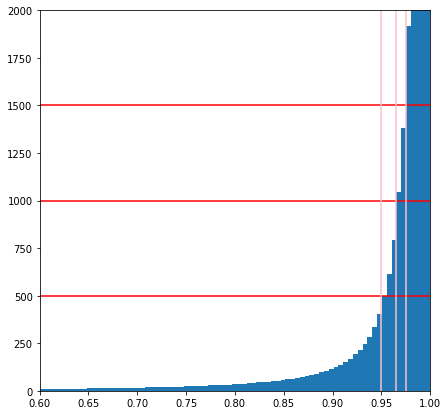

In [117]:
dictionnaire_des_words = nltk.FreqDist(list_all_words)

dictionnaire_words = dict(dictionnaire_des_words)
dictionnaire_pourcentage_words = dictionnaire_words.copy()
somme_total_occurences = sum(dictionnaire_words.values())

for key, value in dictionnaire_pourcentage_words.items():
  dictionnaire_pourcentage_words[key] = dictionnaire_pourcentage_words[key]/somme_total_occurences

#trier dictionnaire
dictionnaire_trie_pourcentage_words = dict(sorted(dictionnaire_pourcentage_words.items(), key=lambda item: item[1] ,reverse=True))
dictionnaire_values_words = list(dictionnaire_trie_pourcentage_words.values())
dictionnaire_keys_words = list(dictionnaire_trie_pourcentage_words.keys())

liste_value_cumul_words = []
somme_cumulee = 0

for valeurs in dictionnaire_values_words : 
  somme_cumulee = somme_cumulee + valeurs
  liste_value_cumul_words.append(somme_cumulee)


liste_value_cumul_words 

plt.figure(figsize = (7,7))
plt.ylim(0, 2000)
plt.xlim(0.6, 1)
plt.axhline(y = 1500, color='red')
plt.axhline(y = 1000, color='red')
plt.axhline(y = 500, color='red')
plt.axvline(x = 0.95, color='pink')
plt.axvline(x = 0.975, color='pink')
plt.axvline(x = 0.965, color='pink')
plt.hist(liste_value_cumul_words, bins = 200)
plt.show()

### D'après l'étude empirique, il semble que 1000 tokens soit un bon compromis

In [118]:
list_all_words = [j for i in df_effective_args['no_stop_words'].tolist() for j in i]
print(len(list_all_words))
dictionnaire_des_frequences = nltk.FreqDist(list_all_words)
nombre_de_mots_to_save = 1000
dictionnaire_des_frequences = dictionnaire_des_frequences.most_common(nombre_de_mots_to_save)
number = []
words = []
for i in range(0, nombre_de_mots_to_save):
  words.append(dictionnaire_des_frequences[i][0])
  number.append(dictionnaire_des_frequences[i][1])
somme = 0
for element in number :
  somme = somme + element
print(somme)

776727
613002
